In [1]:
import torch
from torch.optim import Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/cars.csv', index_col = 'Unnamed: 0')
df

,speed,dist
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16
6,9,10
7,10,18
8,10,26
9,10,34
10,11,17


In [8]:
w = torch.empty(1, requires_grad = True)
b = torch.empty(1, requires_grad = True)
torch.nn.init.uniform_(w)
torch.nn.init.uniform_(b)

tensor([0.5904], requires_grad=True)

In [9]:
x = torch.FloatTensor(df['speed'].values)
y = torch.FloatTensor(df['dist'].values)

In [10]:
def cost():
    hx = w*x + b
    c = torch.mean((hx - y)**2)
    return c

In [11]:
optimizer = Adam([w,b], lr = 0.01)
for epoch in range(2000):
    c = cost()
    optimizer.zero_grad()
    c.backward()
    optimizer.step()
    print('cost:', c.item())

cost: 1317.992919921875
cost: 1306.86962890625
cost: 1295.8074951171875
cost: 1284.8070068359375
cost: 1273.8692626953125
cost: 1262.9957275390625
cost: 1252.186767578125
cost: 1241.4437255859375
cost: 1230.76708984375
cost: 1220.158203125
cost: 1209.617431640625
cost: 1199.14599609375
cost: 1188.7445068359375
cost: 1178.4134521484375
cost: 1168.1539306640625
cost: 1157.96630859375
cost: 1147.8509521484375
cost: 1137.80908203125
cost: 1127.8409423828125
cost: 1117.9468994140625
cost: 1108.127685546875
cost: 1098.38330078125
cost: 1088.714599609375
cost: 1079.1214599609375
cost: 1069.604736328125
cost: 1060.1640625
cost: 1050.7999267578125
cost: 1041.5125732421875
cost: 1032.30224609375
cost: 1023.1687622070312
cost: 1014.1124877929688
cost: 1005.1333618164062
cost: 996.2312622070312
cost: 987.4064331054688
cost: 978.6587524414062
cost: 969.988037109375
cost: 961.3944702148438
cost: 952.8777465820312
cost: 944.4378051757812
cost: 936.074462890625
cost: 927.7874755859375
cost: 919.576721

In [22]:
def hxFn(xd):
    xd = torch.FloatTensor(xd)
    hx = w*xd + b
    print(type(hx))
    return hx.detach().numpy()

In [23]:
w

tensor([3.0709], requires_grad=True)

In [24]:
b

tensor([-2.8737], requires_grad=True)

In [25]:
hxFn(15)

<class 'torch.Tensor'>


array([-2.8737125, -2.8737125, -2.8737125, -2.8737125, -2.8737125,
       -2.8737125, -2.8737125, -2.8737125, -2.8737125, -2.8737125,
       -2.8737125, -2.8737125, -2.8737125, -2.8737125, -2.8737125],
      dtype=float32)

In [26]:
hxFn([15,20])

<class 'torch.Tensor'>


array([43.19046, 58.54518], dtype=float32)

In [27]:
pred = hxFn(x)
pred

<class 'torch.Tensor'>


array([ 9.410067,  9.410067, 18.6229  , 18.6229  , 21.693846, 24.764791,
       27.835735, 27.835735, 27.835735, 30.90668 , 30.90668 , 33.977623,
       33.977623, 33.977623, 33.977623, 37.04857 , 37.04857 , 37.04857 ,
       37.04857 , 40.119514, 40.119514, 40.119514, 40.119514, 43.19046 ,
       43.19046 , 43.19046 , 46.261406, 46.261406, 49.33235 , 49.33235 ,
       49.33235 , 52.403297, 52.403297, 52.403297, 52.403297, 55.474236,
       55.474236, 55.474236, 58.54518 , 58.54518 , 58.54518 , 58.54518 ,
       58.54518 , 64.68707 , 67.75802 , 70.828964, 70.828964, 70.828964,
       70.828964, 73.89991 ], dtype=float32)

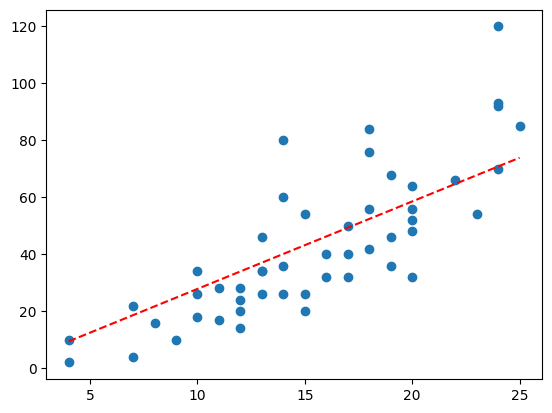

In [31]:
plt.scatter(x, y)
plt.plot(x, pred, 'r--')
plt.show()